# Deteccion de anomalias.

In [1]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. Como primer paso se tienen las features que tomamos del ejemplo en clase:

In [2]:
estatura= [1.77,1.74,1.72,1.65,1.85,1.85,1.75,1.73,1.82,1.65,1.79,1.72,1.7,1.57,1.66,1.75,1.77]
edad=[26,31,24,32,34,26,21,23,24,25,25,34,26,25,26,27,32]

Procedemos a graficar la data de tal forma que nos podemos dar cuenta de las tendencias  que se tienen.:

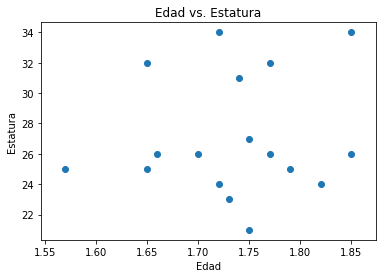

In [3]:
#plt.scatter(edad, estatura, alpha=0.5)
plt.scatter(estatura,edad)
plt.xlabel('Edad')
plt.ylabel('Estatura')
plt.title('Edad vs. Estatura')
plt.show()

### 2. Luego procedemos a extraer los parametros estadisiticos, obtenemos la media y la desviacion estandard:

In [4]:
mu = np.array([np.mean(estatura), np.mean(edad)]) #Vector de medias
sigma = np.array([np.std(estatura),np.std(edad)]) #Vector de desviaciones estandards

In [5]:
mu

array([ 1.73470588, 27.11764706])

In [6]:
sigma

array([0.07220214, 3.8330199 ])

### 3. Procedemos con la creacion de un ejemplo aleatorio y  la verificio:

In [7]:
epsilon  = 0.004
xTest = np.array([[1.75,25],
                  [1.69,23],
                  [1.79,26],
                  [3.00,23], #Se prueba con un dato anomalo en la estatura
                  [1.76,5], #Se prueba con un dato anomalo en la edad
                  [2.00,14]]) #Se prueba con un dato anomalo en la edad y altura

In [8]:
productProb = np.prod(np.multiply(np.divide(1,np.sqrt(2*np.pi)*sigma),
                                  np.power(np.e,-1*np.divide(np.power(xTest - mu,2),
                                  2*np.power(sigma,2)))),axis=1)
productProb

array([4.82732179e-01, 2.66615433e-01, 4.11067399e-01, 6.64891024e-68,
       3.18334826e-08, 1.92697643e-06])

In [9]:
anomalias = pd.DataFrame({'Estatura':xTest[:,0],'Edad':xTest[:,1],'aux':productProb})
anomalias
anomalias.loc[(anomalias.aux<=epsilon) , 'Tipo de dato'] = 'Anomalo' 
anomalias.loc[(anomalias.aux>epsilon) , 'Tipo de dato'] = 'No-Anomalo' 
anomalias = anomalias.drop(['aux'],axis=1)
anomalias

,Estatura,Edad,Tipo de dato
0,1.75,25.0,No-Anomalo
1,1.69,23.0,No-Anomalo
2,1.79,26.0,No-Anomalo
3,3.00,23.0,Anomalo
4,1.76,5.0,Anomalo
5,2.00,14.0,Anomalo


## Comentarios:

Para el training set, el 100% de las observaciones tomadas eran **no-anomalos** por lo que una observacion anomala, con el correcto epsilon seria facil de verificar. 

En este tipo de algoritmos, podemos tener data desvalanciada, por lo que no es combeniente usar un accuracy como metrica de evaluacion.

Unas posibles metricas de evaluacion, se basan en medir los tipos de errores presentados en la matriz de confusion, precision/recall y F1-Score. 

Vemos tambien que este algoritmo no requiere de una gran cantidad de datos para ser utilizado (17 datos para este ejemplo), la desventaja es que se puede tener una observacion que no sea anomala y el sistema la detectara como tal (por ejemplo puede existir una persona de 50 años que este tomando la maestria y medir 1.65. Esto es precisamente factible, sin embargo, por la edad puede ser tomada como una observacion anomala)